# Supervised Regression

## Problem Definition

### Context
Joe Blogs is about to start a job that requires him to wake up super early every morning. Unfortunately, he knows that he’s a light sleeper, and has experiences of being disturbed by rowdy pedestrians on the streets. Before he chooses an apartment, he wants to build a model to predict the potential pedestrian noise levels at night. The exact neighbourhood he’s moving to doesn’t have noise data, but an adjoining one does.

### Objective
Predict the amount of pedestrian noise levels at night.


In [ ]:
# Colab
from google.colab import files
import io

# Data manipulation
import numpy as np
import pandas as pd

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## Importing Data

In [ ]:
# Upload CSV file and store in a pandas dataframe
uploaded_csv = files.upload()
df = pd.read_csv(io.BytesIO(uploaded_csv['supervised-regression-data.csv']))

Saving supervised-regression-data.csv to supervised-regression-data.csv


## Inspecting DataFrame

In [ ]:
# Interpret the dataset
df.describe().T



,count,mean,std,min,25%,50%,75%,max
HumanNoiseNight,4588.0,34.801755,8.198883,14.840678,29.677601,33.408928,37.766336,72.078884
TrafficNoiseDay,4588.0,53.156858,11.030033,20.151698,44.687284,54.034145,61.614710,81.396175
TrafficNoiseNight,3149.0,45.936548,11.322832,16.775088,36.257750,46.761318,54.814401,74.808621
Accidents,4588.0,13.811247,8.107579,1.000000,8.000000,13.000000,19.000000,44.000000
Bars,4588.0,11.133391,11.077805,1.000000,2.000000,7.000000,18.000000,47.000000
OldTown,4588.0,33510.333261,37566.834119,0.000000,0.000000,15918.500000,67419.250000,133499.000000
ProtectedBuildings,4588.0,1035.531604,3439.682340,0.000000,0.000000,0.000000,158.000000,24445.000000
UrbanDensification,4588.0,41426.468178,37020.210723,0.000000,6855.750000,36671.500000,64499.750000,261005.000000
multi_family_houses,4588.0,4062.238884,11992.289897,0.000000,0.000000,0.000000,0.000000,108641.000000
single_family_houses,4588.0,1444.624019,5558.890122,0.000000,0.000000,0.000000,0.000000,52259.000000


In [ ]:
# Finding correlation
corr = df.corr()
c1 = corr.abs().unstack()
list(c1.sort_values(ascending=False).items())[len(df.columns)::2][:5]

[(('TrafficNoiseNight', 'TrafficNoiseDay'), 0.9156754655878607),
 (('UrbanRenewal', 'ProtectedBuildings'), 0.7797917637870427),
 (('ProtectedBuildings', 'TechnicalFacilities'), 0.6190983777471941),
 (('UrbanDensification', 'OldTown'), 0.5346268840954866),
 (('OldTown', 'Bars'), 0.5194773766936771)]

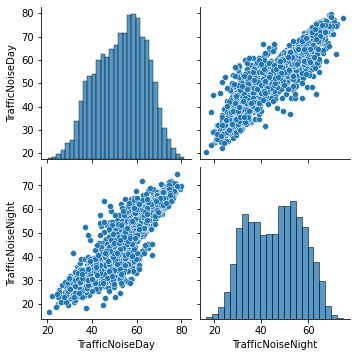

In [ ]:
# Visualise the correlation
sns.pairplot(df[['TrafficNoiseDay', 'TrafficNoiseNight']])

(array([[  6.,   6.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  7.,  47.,  19.,   0.,   1.,   0.,   0.,   0.,   0.,   0.],
        [  1.,  70., 190.,  23.,   0.,   1.,   1.,   0.,   0.,   0.],
        [  0.,  14., 151., 219.,  18.,   2.,   3.,   1.,   0.,   0.],
        [  2.,   6.,  46., 176., 171.,  26.,   8.,   3.,   1.,   0.],
        [  0.,   3.,  25.,  52., 183., 257.,  41.,   7.,   1.,   0.],
        [  0.,   0.,   9.,  22.,  27., 238., 263.,  52.,   6.,   0.],
        [  0.,   0.,   0.,   0.,  10.,  13., 208., 216.,  33.,   1.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   8.,  97., 109.,   3.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,  30.,  14.]]),
 array([20.64668497, 26.55029303, 32.45390108, 38.35750914, 44.26111719,
        50.16472525, 56.0683333 , 61.97194136, 67.87554942, 73.77915747,
        79.68276553]),
 array([16.77508806, 22.5784414 , 28.38179473, 34.18514806, 39.9885014 ,
        45.79185473, 51.59520806, 57.39856139, 63.201914

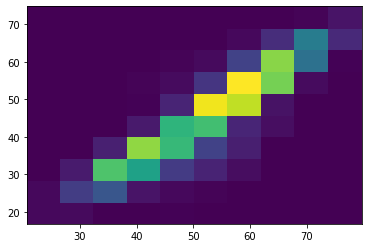

In [ ]:
# See density of points
traffic_noise_day = df[df['TrafficNoiseNight'].notnull()]['TrafficNoiseDay']
traffic_noise_night = df[df['TrafficNoiseNight'].notnull()]['TrafficNoiseNight']
plt.hist2d(traffic_noise_day, traffic_noise_night)

## Modelling Collinearity

In [ ]:
# Extract data
df_without_nan = df.loc[df['TrafficNoiseNight'].notnull()]
input_npa = np.array(df_without_nan['TrafficNoiseDay']).reshape((-1, 1))
output_npa = np.array(df_without_nan['TrafficNoiseNight'])

In [ ]:
# Build model
lin_reg_model = LinearRegression()
lin_reg_model.fit(input_npa, output_npa)

LinearRegression()

In [ ]:
# Evaluate model (r sqaure)
lin_reg_model.score(input_npa, output_npa)

0.8384615582795446

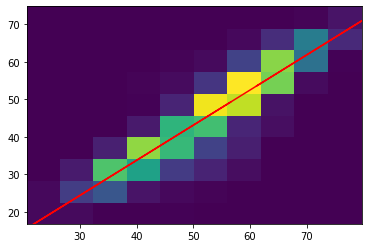

In [ ]:
# Visualising linear regression
x = input_npa
m = lin_reg_model.coef_
b = lin_reg_model.intercept_

plt.hist2d(input_npa.flatten(), output_npa)
plt.plot(x, m * x + b, color='r')

## Model-based Imputation

In [ ]:
# Predict on missing values
mbi_df = df.copy()
inputed = lin_reg_model.predict(np.array(mbi_df['TrafficNoiseDay']).reshape(-1, 1))
mbi_df['TrafficNoiseNight'].fillna(pd.Series(inputed), inplace=True)

In [ ]:
# Confirm
mbi_df.describe().T

,count,mean,std,min,25%,50%,75%,max
HumanNoiseNight,4588.0,34.801755,8.198883,14.840678,29.677601,33.408928,37.766336,72.078884
TrafficNoiseDay,4588.0,53.156858,11.030033,20.151698,44.687284,54.034145,61.614710,81.396175
TrafficNoiseNight,4588.0,46.055498,11.008567,15.106479,37.095233,46.848631,54.635662,74.808621
Accidents,4588.0,13.811247,8.107579,1.000000,8.000000,13.000000,19.000000,44.000000
Bars,4588.0,11.133391,11.077805,1.000000,2.000000,7.000000,18.000000,47.000000
OldTown,4588.0,33510.333261,37566.834119,0.000000,0.000000,15918.500000,67419.250000,133499.000000
ProtectedBuildings,4588.0,1035.531604,3439.682340,0.000000,0.000000,0.000000,158.000000,24445.000000
UrbanDensification,4588.0,41426.468178,37020.210723,0.000000,6855.750000,36671.500000,64499.750000,261005.000000
multi_family_houses,4588.0,4062.238884,11992.289897,0.000000,0.000000,0.000000,0.000000,108641.000000
single_family_houses,4588.0,1444.624019,5558.890122,0.000000,0.000000,0.000000,0.000000,52259.000000


## Dataset Division and Scaling

In [ ]:
OUTPUT_COLUMN = 'HumanNoiseNight'

# Split dataframe into training and testing dataframe (90% split)
train_df = mbi_df.sample(frac=0.9)
test_df = mbi_df.drop(train_df.index)

# Seperate input and output columns
train_input_df = train_df.copy()
train_output_df = train_input_df.pop(OUTPUT_COLUMN)

test_input_df = test_df.copy()
test_output_df = test_input_df.pop(OUTPUT_COLUMN)

# Scaler (remapping)
input_scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_input_df = pd.DataFrame(
    input_scaler.fit_transform(train_input_df),
    columns=train_input_df.columns
)
scaled_test_input_df = input_scaler.transform(test_input_df)

output_scaler = MinMaxScaler()
scaled_train_output_df = pd.DataFrame(
    output_scaler.fit_transform(np.array(train_output_df).reshape(-1, 1)),
    columns=[OUTPUT_COLUMN]
)
scaled_test_output_df = output_scaler.transform(np.array(test_output_df).reshape(-1, 1))

scaled_train_input_df


## Approach 1: Multivariate Linear Regression

In [ ]:
input_shape = [23]
# input_shape = [*scaled_train_input_df.shape[1:]]
# Build model
lin_reg_model = keras.Sequential([
    layers.Dense(1, input_shape=input_shape)
])
lin_reg_model.summary()

In [ ]:
lin_reg_model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    loss=tf.keras.losses.MSE
)

In [ ]:
lin_reg_history = lin_reg_model.fit(
    x=scaled_train_input_df,
    y=scaled_train_output_df,
    epochs=100,
    validation_split=0.2
)

Epoch 1/100
104/104 [==============================] - 0s 4ms/step - loss: 0.0134 - val_loss: 0.0130
Epoch 2/100
104/104 [==============================] - 0s 3ms/step - loss: 0.0134 - val_loss: 0.0130
Epoch 3/100
104/104 [==============================] - 0s 3ms/step - loss: 0.0134 - val_loss: 0.0130
Epoch 4/100
104/104 [==============================] - 0s 3ms/step - loss: 0.0134 - val_loss: 0.0129
Epoch 5/100
104/104 [==============================] - 0s 3ms/step - loss: 0.0134 - val_loss: 0.0129
Epoch 6/100
104/104 [==============================] - 0s 3ms/step - loss: 0.0133 - val_loss: 0.0129
Epoch 7/100
104/104 [==============================] - 0s 3ms/step - loss: 0.0133 - val_loss: 0.0129
Epoch 8/100
104/104 [==============================] - 0s 4ms/step - loss: 0.0133 - val_loss: 0.0129
Epoch 9/100
104/104 [==============================] - 1s 7ms/step - loss: 0.0133 - val_loss: 0.0129
Epoch 10/100
104/104 [==============================] - 1s 6ms/step - loss: 0.0133 - val_lo

## Approach 2: Logistic Regression

In [ ]:
# layers.Dense(1, input_shape=input_shape, activation='sigmoid')

## Approach 3: The Neural Network

In [ ]:
# layers.Dense(64, input_shape=input_shape, activation='relu'),
# layers.Dense(32, activation='relu'),
# layers.Dense(1, activation='sigmoid'),

## Assessing Model Performance

In [ ]:
# Helper functions
def see_final_loss(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    return hist.tail()

def plot_loss(history):
    plot = plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)
    return plot

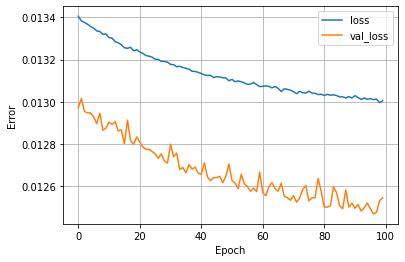

In [ ]:
plot_loss(lin_reg_history)

In [ ]:
# Sample outputs
INDEX = 0
x = scaled_train_input_df.iloc[INDEX]
y = scaled_train_output_df.iloc[INDEX]

x_npa = np.array(x).reshape(1, -1)

mv_lin_reg_pred = mv_lin_reg_model.predict(x_npa)
log_reg_pred = log_reg_model.predict(x_npa)
neural_net_pred = neural_net_model.predict(x_npa)

print(f"""
Predicting on...
{pd.DataFrame(input_scaler.inverse_transform(x_npa), columns=scaled_train_input_df.columns).T}

Expected Output: {output_scaler.inverse_transform([y])[0][0]} db

Multivariate Linear Regression Prediction: {output_scaler.inverse_transform(mv_lin_reg_pred)[0][0]} db
Logistic Regression Prediction: {output_scaler.inverse_transform(log_reg_pred)[0][0]} db
Neural Network Prediction: {output_scaler.inverse_transform(neural_net_pred)[0][0]} db
"""
)